In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("cardekho_data.csv")

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
num_col= ["Year","Selling_Price", "Present_Price","Kms_Driven"]

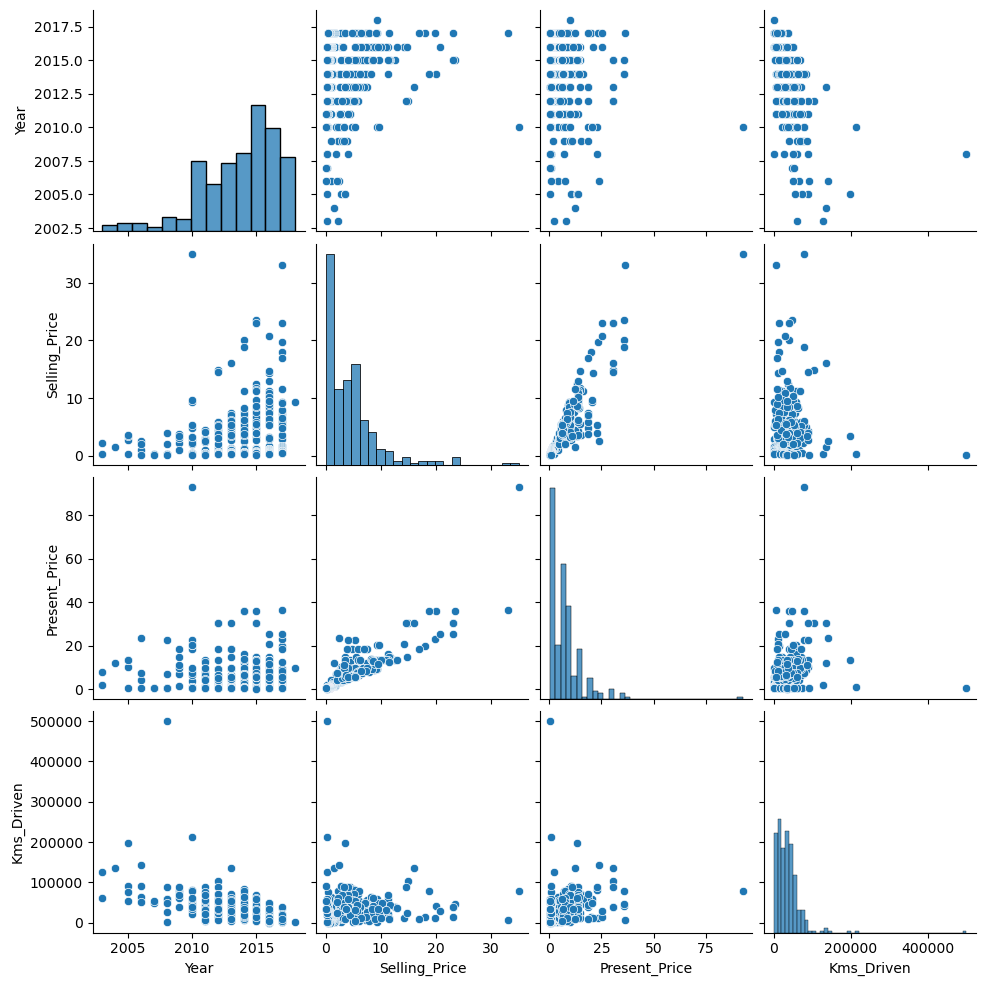

In [5]:
sns.pairplot(df[num_col])

<Axes: >

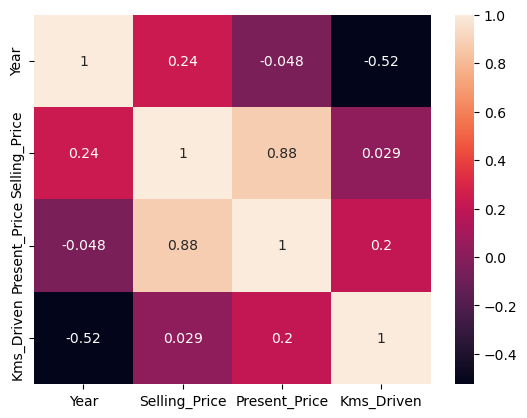

In [6]:
sns.heatmap(df[num_col].corr(),annot = True)

In [7]:
cat_cols = ["Fuel_Type","Seller_Type","Transmission"]

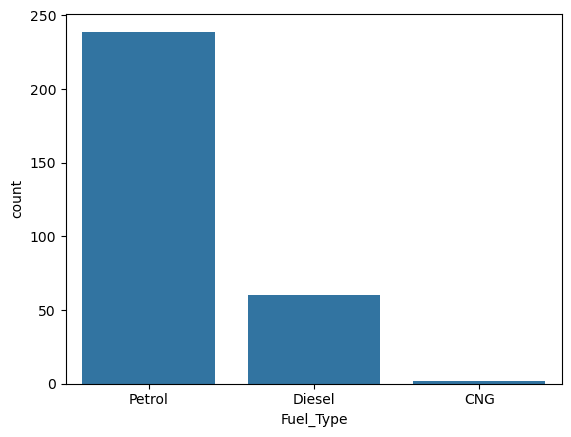

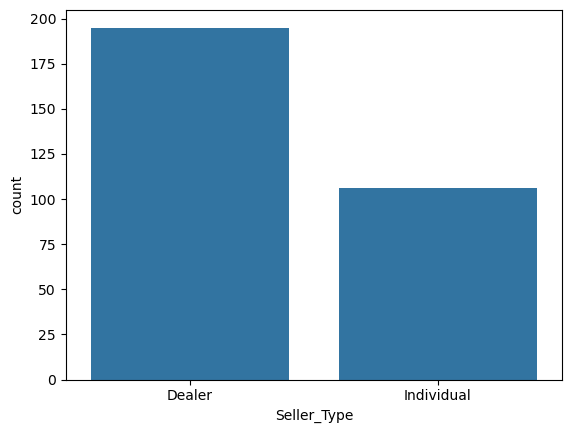

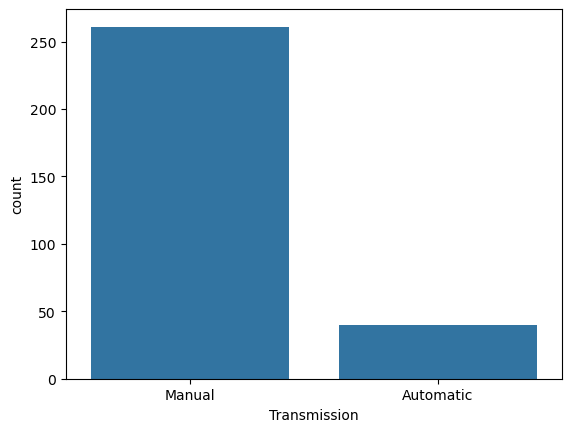

In [8]:
for i in cat_cols:
    sns.countplot(x = i, data = df)
    plt.show()

In [9]:
df.drop("Car_Name",axis = 1, inplace = True)

In [10]:
df

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
label = LabelEncoder()

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           301 non-null    int64  
 1   Selling_Price  301 non-null    float64
 2   Present_Price  301 non-null    float64
 3   Kms_Driven     301 non-null    int64  
 4   Fuel_Type      301 non-null    object 
 5   Seller_Type    301 non-null    object 
 6   Transmission   301 non-null    object 
 7   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 18.9+ KB


In [14]:
for i in df.select_dtypes(include = ["object"]).columns:
    df[i] = label.fit_transform(df[i])

In [15]:
df

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,2,0,1,0
1,2013,4.75,9.54,43000,1,0,1,0
2,2017,7.25,9.85,6900,2,0,1,0
3,2011,2.85,4.15,5200,2,0,1,0
4,2014,4.60,6.87,42450,1,0,1,0
...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,1,0,1,0
297,2015,4.00,5.90,60000,2,0,1,0
298,2009,3.35,11.00,87934,2,0,1,0
299,2017,11.50,12.50,9000,1,0,1,0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           301 non-null    int64  
 1   Selling_Price  301 non-null    float64
 2   Present_Price  301 non-null    float64
 3   Kms_Driven     301 non-null    int64  
 4   Fuel_Type      301 non-null    int32  
 5   Seller_Type    301 non-null    int32  
 6   Transmission   301 non-null    int32  
 7   Owner          301 non-null    int64  
dtypes: float64(2), int32(3), int64(3)
memory usage: 15.4 KB


In [17]:
x = df.drop("Selling_Price",axis = 1)
y = df["Selling_Price"]

In [18]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.33, random_state=42
)


In [19]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state = 42)
                              

In [20]:
model.fit(x_train,y_train)

RandomForestRegressor(random_state=42)

In [21]:
y_pred = model.predict(x_test)

In [22]:
from sklearn.metrics import r2_score

In [23]:
r2_score(y_test,y_pred)

0.960701966521317

In [24]:
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [25]:
random_search = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state = 42),
    param_distributions=param_dist,
    n_iter=20,            # number of random combinations to try
    cv=3,                 # 5-fold cross-validation
    scoring='accuracy',   # metric
    random_state=42,
    n_jobs=-1             # use all CPUs
)


In [26]:
random_search.fit(x_train, y_train)


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20, 30],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200]},
                   random_state=42, scoring='accuracy')

In [27]:
print("Best Parameters:", random_search.best_params_)
best_model = random_search.best_estimator_


Best Parameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 20}


In [28]:
y_pred = random_search.predict(x_test)


In [29]:
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

R2 Score: 0.9223393210182278


In [30]:
import pickle 
with open ("model.pkl","wb") as fs:
    pickle.dump(model,fs)